In [3]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing Data

## Define Data Folders

In [1]:
parent_data_folder = "F:/Dropbox/Projects/001 - CNRL - Pipewise/005 - Field Test/2023/data"
#TEAC_raw_data_folder = parent_data_folder + "/TEAC/Raw Data/"
raw_test_name = parent_data_folder + "/data.csv"

In [4]:
data_frame = pd.read_csv(raw_test_name)

In [6]:
# Convert the time column to datetime objects
data_frame['time'] = pd.to_datetime(data_frame['time'])

In [14]:
# Calculate the relative time in seconds
data_frame['relative_time'] = (data_frame['time'] - data_frame['time'].iloc[0]).dt.total_seconds()

# Access the relative time column
time_values = data_frame['relative_time']


In [15]:
print(data_frame)

                               time  Channel 0  Channel 1  relative_time
0        2023-05-10 12:42:02.926356   1.040632   0.927865       0.000000
1        2023-05-10 12:42:02.926542   1.005348   0.893043       0.000186
2        2023-05-10 12:42:02.926582   0.986170   0.874228       0.000226
3        2023-05-10 12:42:02.926616   0.952052   0.840538       0.000260
4        2023-05-10 12:42:02.926648   0.934415   0.823263       0.000292
...                             ...        ...        ...            ...
21334725 2023-05-10 13:49:09.175993   0.038403   0.035951    4026.249637
21334726 2023-05-10 13:49:09.176036   0.018348   0.017006    4026.249680
21334727 2023-05-10 13:49:09.176073   0.007955   0.006875    4026.249717
21334728 2023-05-10 13:49:09.176108  -0.004213  -0.004209    4026.249752
21334729 2023-05-10 13:49:09.176142  -0.010490  -0.009885    4026.249786

[21334730 rows x 4 columns]


## Shape into Dataframe

# Meta Validation

### Maximum, minimums and average

In [37]:
# Calculate the maximum, minimum, and average values
max_values = data_frame.max()
min_values = data_frame.min()
average_values = data_frame.mean()

# Create a DataFrame with the results
stats_df = pd.DataFrame({'Maximum': max_values, 'Minimum': min_values, 'Average': average_values})

# Round the values to 1 decimal place
stats_df_rounded = stats_df.round(1)

# Display the results in a tabular format
print(stats_df_rounded)

# Note: values of 0.0 indicate that - most likely - the channel was not used

### Data Points & Recording Time

In [16]:
# Access the first column using its index and count the number of data points
#time_values = data_frame.iloc[:, 0]
#data_points_count = time_values.count()

# Workaround to account for files that don't start at 0 seconds
initial_recording_time = time_values.iloc[0]
final_recording_time = time_values.iloc[-1]
delta_recording_time = final_recording_time - initial_recording_time

print("Number of data points in the first column:", data_points_count)
print("Data was recorded for", round(delta_recording_time,2), "seconds")
print("Data was recorded for", round(delta_recording_time/60,2), "minutes")
print("Data was recorded for", round(delta_recording_time/3600,2), "hours")

Number of data points in the first column: 21334730
Data was recorded for 4026.25 seconds
Data was recorded for 67.1 minutes
Data was recorded for 1.12 hours


### Sampling rate, Consistency and CV

In [20]:
# Calculate the time differences between consecutive data points
time_differences = time_values.diff().dropna()

# Define the expected sampling rate (in Hz) and maximum allowed deviation (in percentage)
expected_sampling_rate = 12000  # Replace with your expected sampling rate
max_allowed_deviation = 0.05  # 5% deviation, for example

# Calculate the expected time difference between consecutive data points
expected_time_difference = 1 / expected_sampling_rate

# Calculate the deviation of each time difference from the expected time difference
deviation = np.abs(time_differences - expected_time_difference)

# Count the number of time intervals that exceed the maximum allowed deviation
exceed_threshold_count = np.sum(deviation > max_allowed_deviation * expected_time_difference)

# Calculate the percentage of time intervals that exceed the maximum allowed deviation
exceed_threshold_percentage = exceed_threshold_count / len(time_differences) * 100

# Calculate the effective sampling rate
effective_sampling_rate = 1 / time_differences.mean()

print(f"Expected sampling rate: {expected_sampling_rate} Hz")
print(f"Effective sampling rate: {effective_sampling_rate:.2f} Hz")
print(f"Number of time intervals exceeding {max_allowed_deviation * 100}% deviation: {exceed_threshold_count}")
print(f"Percentage of time intervals exceeding {max_allowed_deviation * 100}% deviation: {exceed_threshold_percentage:.2f}%")

Expected sampling rate: 12000 Hz
Effective sampling rate: 5298.91 Hz
Number of time intervals exceeding 5.0% deviation: 21301152
Percentage of time intervals exceeding 5.0% deviation: 99.84%


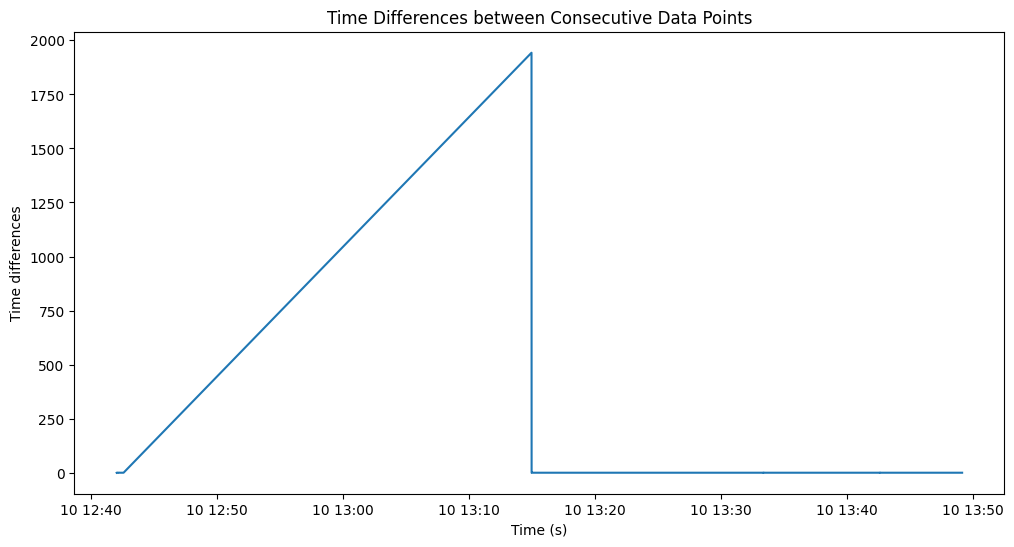

In [22]:
import matplotlib.pyplot as plt

# Remove the first value from time_values to match the length of time_differences
adjusted_time_values = time_values.iloc[1:]

plt.figure(figsize=(12, 6))
plt.plot(adjusted_time_values, time_differences)
plt.xlabel("Time (s)")
plt.ylabel("Time differences")
plt.title("Time Differences between Consecutive Data Points")
plt.show()

# Signal

Plots a single channel against time. Note: To plot a full test length takes a significant amount of time

In [23]:
time_values = data_frame.iloc[:, 0]
device_data = data_frame[["CH13"]]

# Plot the first three columns with time_values as the x-axis
for column in device_data.columns:
    plt.plot(time_values, device_data[column], label=column)

#plt.xlim((100, 120))
#plt.ylim((-10, 11))

# Customize the plot
plt.xlabel('Time [s]')
plt.ylabel('Value [V]')
#plt.title('D1 Ch 0 - 2')
plt.legend(device_data.columns, loc='best')

# Show the plot
plt.show()


KeyError: "None of [Index(['CH13'], dtype='object')] are in the [columns]"